## Initiate the vissim instance

In [1]:
# COM-Server
import win32com.client as com
import igraph
import matplotlib.pyplot as plt
import qgrid
from VISSIM_helpers import VissimRoadNet

Add autocompletion for VISSIM COM Object

In [2]:
from IPython.utils.generics import complete_object

@complete_object.register(com.DispatchBaseClass)
def complete_dispatch_base_class(obj, prev_completions):
    try:
        ole_props = set(obj._prop_map_get_).union(set(obj._prop_map_put_))
        return list(ole_props) + prev_completions
    except AttributeError:
        pass

Start Vissim and load constants

In [3]:
Vissim = com.gencache.EnsureDispatch("Vissim.Vissim")
from win32com.client import constants as c

Load the test network

In [12]:
FileName = r"J:\Thesis\Inital test network.inpx"
Vissim.LoadNet(FileName)

In [13]:
vis_net = Vissim.Net
assert vis_net.DynamicAssignment.CreateGraph(c.CGEdgeTypeDynamicAssignment)

## Read the dynamic assignment nodes and edges

### Convert the network to a igraph directed graph

In [14]:
network_graph = VissimRoadNet(vis_net)

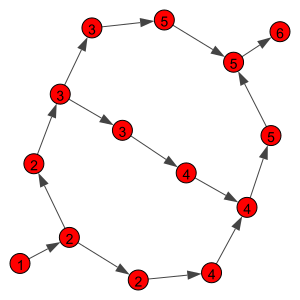

In [18]:
igraph.plot(network_graph, vertex_label=[name.split('.')[1] for name in network_graph.vs["name"]], bbox=(0, 0, 300, 300))

In [16]:
edges_widget = qgrid.show_grid(network_graph.visedges.drop(columns=['No']), show_toolbar=True)
edges_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

detach Vissim instance

In [17]:
Vissim.Exit()
del Vissim